# Функция построения сравнительной диаграммы

Функция для построения сравнительной диаграммы. Функция принимает признак и датасет. Строит диаграмму на которой показывает общее количество пассажиров  признаком и число пассажиров с признаком которые были перемещенны

In [1]:
def getBarplotMarkerVsTransported_rev2(marker, trd):
    # массив, показывающий распределение количества пассажиров - всего по признаку
    trd_marker_all = trd[marker].value_counts()
    # массив с количеством перемещенных пассажиров по признаку
    trd_marker_transported = trd[[marker, 'Transported']].groupby([marker]).value_counts()
    # и приведу в порядок это массив, сбору индексы что бы избавится от многоуровневых индексов
    # и появившееся после этого название столбца 0 переименую в понятное Value
    trd_marker_transported = trd_marker_transported.reset_index().rename(columns={0:'Value'})
    # и концовочка - собрать только те значения, которые относятся к перемещенным
    trd_marker_transported = trd_marker_transported[trd_marker_transported['Transported'] == True]
    # установлю размер полотная для рисования
    f, ax = plt.subplots(figsize=(50, 6))
    # установлю тему seborn с сеткой
    sns.set_theme(style="whitegrid")
    
    df2 = trd_marker_transported[trd_marker_transported['Transported'] == True]

    sns.set_color_codes("pastel")
    sns.barplot(x = trd_marker_all.index, y = trd_marker_all,
                label="Total",
                color = 'b')

    sns.set_color_codes("muted")
    sns.barplot(x = trd_marker_transported['Age'], y = trd_marker_transported['Value'],
                label="Transported",
                color = 'b')

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="", xlabel=f"Диаграмма, сколько было перемещено \n в зависимости от {marker}")
    sns.despine(left=True, bottom=True)

# А. Пропущенные значения

In [2]:
# подключаем widget бэкенд matplotlib как встроенного бэкенда,
# что позволяет выводить графики в этом же ноутбуке под кодом,
# а также дает инструментарий для манипулияций с графикм (зумы, передвижение)
#%matplotlib widget

# подключение интерфейса ползунков из библиотеки пользовательских интерфейсов
#from ipywidgets import interact

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
global pd
global np
global plt
global sns
# считываю данные
# тренировочный сет
trd = pd.read_csv('train.csv')
# тестовые сет
tsd = pd.read_csv('test.csv')
# их соеденить, что бы посмотреть полный состав данных по разным признакам
td = pd.concat([trd,tsd], ignore_index=True, sort = False)

In [3]:
#td

## А1. Тренировочный сет (trd)

In [49]:
trd

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Количество пропущенных значений в тренировочном сете

In [5]:
trd.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Text(0.5, 1.0, 'Missing value heatmap at train set')

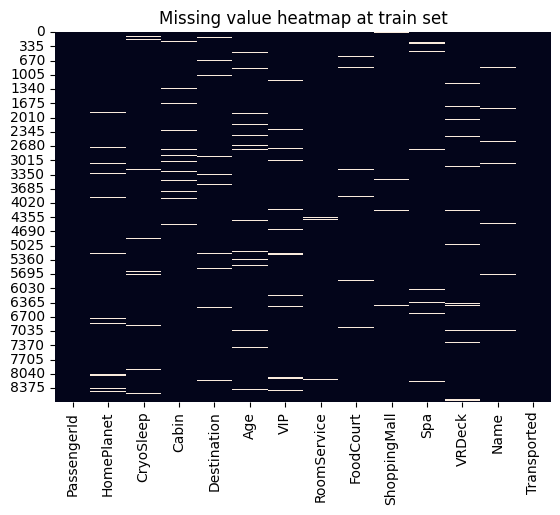

In [6]:
sns.heatmap(trd.isnull(), cbar=False).set_title("Missing value heatmap at train set")

## А2. Тестовый сет

Количество пропущенных значений в тестовом сете

In [7]:
tsd.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Text(0.5, 1.0, 'Missing value heatmap at test set')

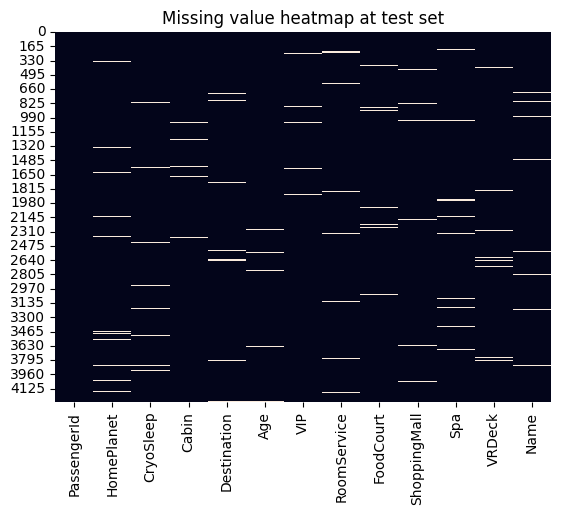

In [8]:
sns.heatmap(tsd.isnull(), cbar=False).set_title("Missing value heatmap at test set")

In [9]:
td.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

## А3. Объединенный сет (тренировочный + тестовый)

Text(0.5, 1.0, 'Missing value heatmap')

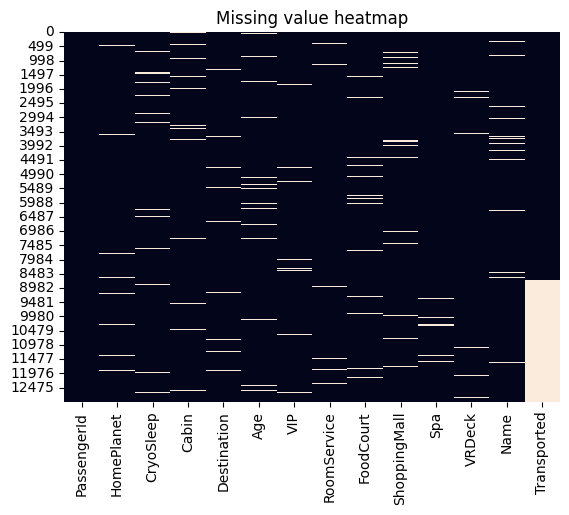

In [10]:
sns.heatmap(td.isnull(), cbar=False).set_title("Missing value heatmap")

# Б. Количество категориальных признаков

Далее, чтобы определить категориальные признаки, я взглянул на количество уникальных значений в каждом столбце. Признаки «Sex» и «Transported» имели два возможных значения, а «Destination» и «HomePlanet» имели три возможных значения.

In [11]:
td.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

# В. Признаки и "перемещенность"

Получив лучшее представление о различных аспектах датасета, я начал исследовать признаки и роль, которую они сыграли в выживании или гибели путешественника.

## В1. Transported - "Перемещенность" в целом, сама по себе

Этот признак показывал, перемещен ли пассажир или нет. Анализ тестового сета показало, что распределение 50 на 50

In [12]:
trd_transported = trd['Transported'].value_counts()
print(trd_transported)

True     4378
False    4315
Name: Transported, dtype: int64


<AxesSubplot: ylabel='Transported'>

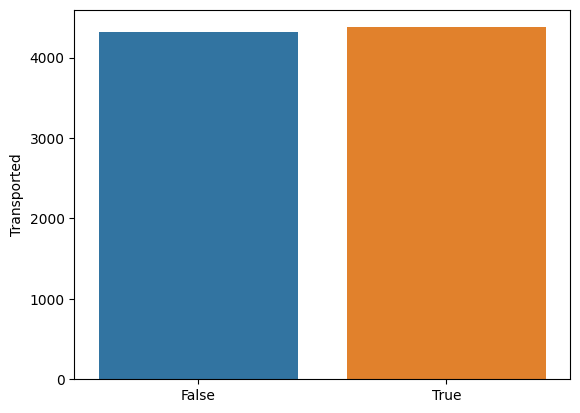

In [13]:
sns.barplot(x = trd_transported.index, y = trd_transported)

## В2. HomePlanet в trd

Описательная статистика признака

In [14]:
trd.HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

Признак, с какой планеты пассажир. Посмотрим распределение и как это связано с перемещенностью пассажира.

In [15]:
trd_home_planet = trd['HomePlanet'].value_counts()

In [16]:
#sns.barplot(x=trd_home_planet.index, y=trd_home_planet)

Посмотрим связь с перемещенностью

In [17]:
# и мне понадобится для этого подготовленный датафрейм
df_homeplanet_transported = pd.DataFrame(columns = ['Earth', 'Europa', 'Mars'], index = ['All', 'Transported'])
# значениями предыдущего датафрейма заполняю первую строку - сколько всего пассажиров с какой планеты
df_homeplanet_transported[df_homeplanet_transported.index == 'All'] = trd_home_planet
#print(df_homeplanet_transported)

In [18]:
trd_home_planet_transported = trd[['HomePlanet', 'Transported']]
#print(trd_home_planet_transported)

In [19]:
HomePlanet = ['Earth','Europa','Mars']

y=[]
for i in range(0, len(HomePlanet)):
    x = trd_home_planet_transported[trd_home_planet_transported['HomePlanet'] == HomePlanet[i]].value_counts()
#    y.append(x[x.index == (HomePlanet[i], True)].values)
    y.append(x[x.index == (HomePlanet[i], True)].values[0])


#    print(y)

df_homeplanet_transported[df_homeplanet_transported.index == 'Transported'] = y



#trd_home_planet_transported_from_

In [20]:
df_homeplanet_transported

,Earth,Europa,Mars
All,4602,2131,1759
Transported,1951,1404,920


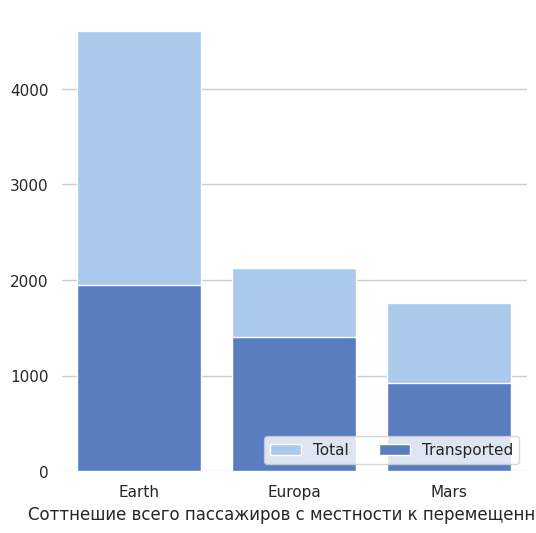

In [21]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(df_homeplanet_transported[df_homeplanet_transported.index == 'All'], label="Total", color = 'b')

sns.set_color_codes("muted")
sns.barplot(df_homeplanet_transported[df_homeplanet_transported.index == 'Transported'], label="Transported", color = 'b')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Соттнешие всего пассажиров с местности к перемещенным")
sns.despine(left=True, bottom=True)

## В3. CryoSleep

In [22]:
# описательная статистика
trd.CryoSleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

<AxesSubplot: xlabel='CryoSleep'>

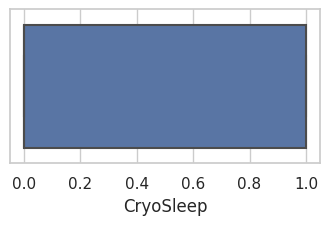

In [45]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_figheight(2)
fig.set_figwidth(4)
sns.boxplot(x=trd.CryoSleep)

Разбор по третьему признаку - Замороженный сон

False    5439
True     3037
Name: CryoSleep, dtype: int64
            CryoSleepTrue CryoSleepFalse
All                  5439           3037
Transported           NaN            NaN
     CryoSleep  Transported
0        False        False
1        False         True
2        False        False
3        False        False
4        False         True
...        ...          ...
8688     False        False
8689      True        False
8690     False         True
8691     False        False
8692     False         True

[8693 rows x 2 columns]
            CryoSleepTrue CryoSleepFalse
All                  5439           3037
Transported          2483           1789


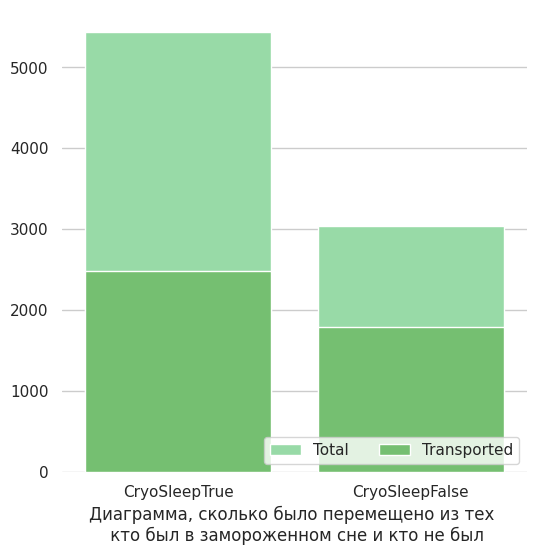

In [23]:
trd_cryo_sleep = trd['CryoSleep'].value_counts()
print(trd_cryo_sleep)
# и мне понадобится для этого подготовленный датафрейм
CryoSleep = ['CryoSleepTrue', 'CryoSleepFalse']
df_cryo_transported = pd.DataFrame(columns = CryoSleep, index = ['All', 'Transported'])
# значениями предыдущего датафрейма заполняю первую строку - сколько всего пассажиров с какой планеты
df_cryo_transported[df_cryo_transported.index == 'All'] = trd_cryo_sleep
print(df_cryo_transported)

trd_cryo_transported = trd[['CryoSleep', 'Transported']]
print(trd_cryo_transported)

y=[]
CryoSleep_flags = [True, False]
for i in range(0, len(CryoSleep)):
    x = trd_cryo_transported[trd_cryo_transported['CryoSleep'] == CryoSleep_flags[i]].value_counts()
    y.append(x[x.index == (CryoSleep_flags[i], True)].values[0])


df_cryo_transported[df_cryo_transported.index == 'Transported'] = y

print(df_cryo_transported)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(df_cryo_transported[df_cryo_transported.index == 'All'], label="Total", color = 'g')

sns.set_color_codes("muted")
sns.barplot(df_cryo_transported[df_cryo_transported.index == 'Transported'], label="Transported", color = 'g')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Диаграмма, сколько было перемещено из тех \n кто был в замороженном сне и кто не был")
sns.despine(left=True, bottom=True)

## В4. Cabin

In [24]:
# описательная статистика
trd.Cabin.describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

## В5. Destination - место назначения

In [25]:
# описательная статистика
trd.Destination.describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [26]:
marker = 'Destination'
trd_marker_all = trd[marker].value_counts()
print(trd_marker_all)
# и мне понадобится для этого подготовленный датафрейм
job_marker_list = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
df_marker_all_vs_transported = pd.DataFrame(columns = job_marker_list, index = ['All', 'Transported'])
# значениями предыдущего датафрейма заполняю первую строку - сколько всего пассажиров с какой планеты
df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'All'] = trd_marker_all
print(df_marker_all_vs_transported)

trd_marker_transported = trd[[marker, 'Transported']]
print(trd_marker_transported)

marker_flags = [True, False]
x = trd_marker_transported[trd_marker_transported[marker] == marker_flags[0]].value_counts()
print(x)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
            TRAPPIST-1e 55 Cancri e PSO J318.5-22
All                5915        1800           796
Transported         NaN         NaN           NaN
        Destination  Transported
0       TRAPPIST-1e        False
1       TRAPPIST-1e         True
2       TRAPPIST-1e        False
3       TRAPPIST-1e        False
4       TRAPPIST-1e         True
...             ...          ...
8688    55 Cancri e        False
8689  PSO J318.5-22        False
8690    TRAPPIST-1e         True
8691    55 Cancri e        False
8692    TRAPPIST-1e         True

[8693 rows x 2 columns]
Series([], dtype: int64)


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
            TRAPPIST-1e 55 Cancri e PSO J318.5-22
All                5915        1800           796
Transported         NaN         NaN           NaN
        Destination  Transported
0       TRAPPIST-1e        False
1       TRAPPIST-1e         True
2       TRAPPIST-1e        False
3       TRAPPIST-1e        False
4       TRAPPIST-1e         True
...             ...          ...
8688    55 Cancri e        False
8689  PSO J318.5-22        False
8690    TRAPPIST-1e         True
8691    55 Cancri e        False
8692    TRAPPIST-1e         True

[8693 rows x 2 columns]
            TRAPPIST-1e 55 Cancri e PSO J318.5-22
All                5915        1800           796
Transported        2787        1098           401


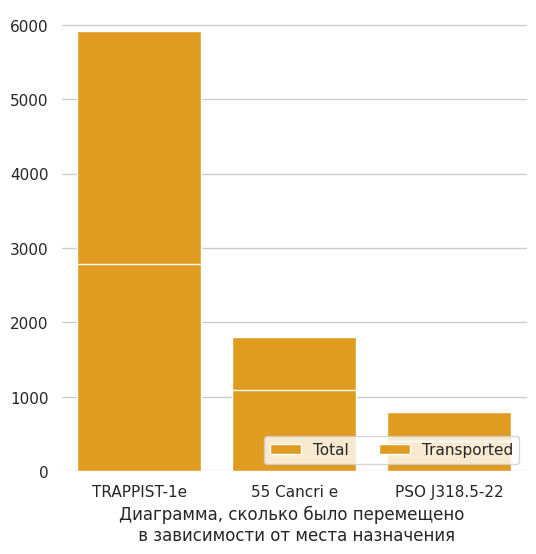

In [27]:
marker = 'Destination'
trd_marker_all = trd[marker].value_counts()
print(trd_marker_all)
# и мне понадобится для этого подготовленный датафрейм
job_marker_list = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
df_marker_all_vs_transported = pd.DataFrame(columns = job_marker_list, index = ['All', 'Transported'])
# значениями предыдущего датафрейма заполняю первую строку - сколько всего пассажиров с какой планеты
df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'All'] = trd_marker_all
print(df_marker_all_vs_transported)

trd_marker_transported = trd[[marker, 'Transported']]
print(trd_marker_transported)

y=[]
#marker_flags = [True, False]
for i in range(0, len(job_marker_list)):
    x = trd_marker_transported[trd_marker_transported[marker] == job_marker_list[i]].value_counts()
    y.append(x[x.index == (job_marker_list[i], True)].values[0])


df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'Transported'] = y

print(df_marker_all_vs_transported)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'All'], label="Total", color = 'orange')

sns.set_color_codes("muted")
sns.barplot(df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'Transported'], label="Transported", color = 'orange')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Диаграмма, сколько было перемещено \n в зависимости от места назначения")
sns.despine(left=True, bottom=True)

## В6. VIP

In [28]:
# описательная статистика
trd.VIP.describe()

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object

            False True 
All          8291   199
Transported  4198    76


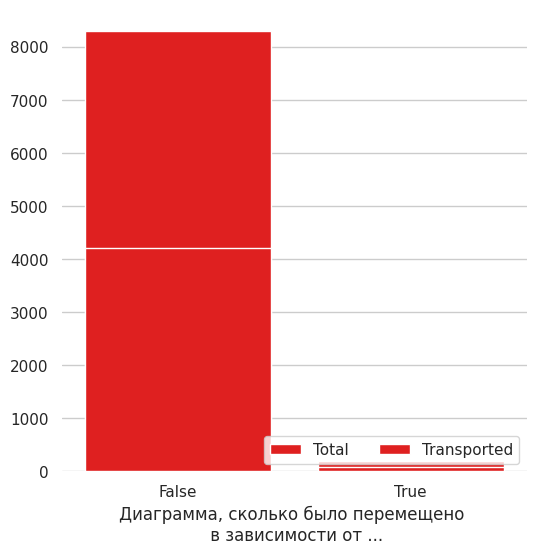

In [29]:
def getBarplotMarkerVsTransported(marker, job_marker_list, trd):

    trd_marker_all = trd[marker].value_counts()
#    print(trd_marker_all)
    #и мне понадобится для этого подготовленный датафрейм
#    job_marker_list = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
    df_marker_all_vs_transported = pd.DataFrame(columns = job_marker_list, index = ['All', 'Transported'])
#    print(df_marker_all_vs_transported)
    # значениями предыдущего датафрейма заполняю первую строку - сколько всего пассажиров с какой планеты
    df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'All'] = trd_marker_all     
#    print(df_marker_all_vs_transported)

    trd_marker_transported = trd[[marker, 'Transported']]
#    print(trd_marker_transported)

    y=[]
    #marker_flags = [True, False]
    for i in range(0, len(job_marker_list)):
        x = trd_marker_transported[trd_marker_transported[marker] == job_marker_list[i]].value_counts()
        y.append(x[x.index == (job_marker_list[i], True)].values[0])


    df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'Transported'] = y
    print(df_marker_all_vs_transported)

#    sns.set_theme(style="whitegrid")
#    f, ax = plt.subplots(figsize=(6, 6))
    df1 = df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'All'].T
    df2 = df_marker_all_vs_transported[df_marker_all_vs_transported.index == 'Transported'].T
#    print(df1)
#    print(df1.index)
#    print(df1['All'])

                                        


    sns.set_color_codes("pastel")
    sns.barplot(x = df1.index, y = df1['All'],
                label="Total",
                color = '#f000')

    sns.set_color_codes("muted")
    sns.barplot(x = df2.index, y = df2['Transported'],
                label="Transported",
                color = '#f000')

    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(ylabel="", xlabel="Диаграмма, сколько было перемещено \n в зависимости от ...")
    sns.despine(left=True, bottom=True)

f, ax = plt.subplots(figsize=(6, 6))
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(ylabel="", xlabel="Диаграмма, сколько было перемещено \n в зависимости от ...")
#    sns.despine(left=True, bottom=True)

getBarplotMarkerVsTransported('VIP', [False, True], trd)

## В7. Age

In [30]:
# описательная статистика
trd.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

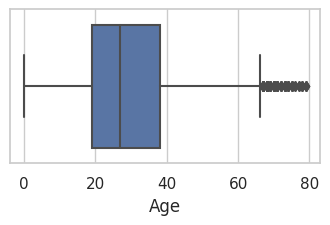

In [44]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_figheight(2)
fig.set_figwidth(4)
sns.boxplot(x=trd.Age)

In [31]:
trd_age_all = trd['Age'].value_counts()
print(trd_age_all)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


<AxesSubplot: ylabel='Age'>

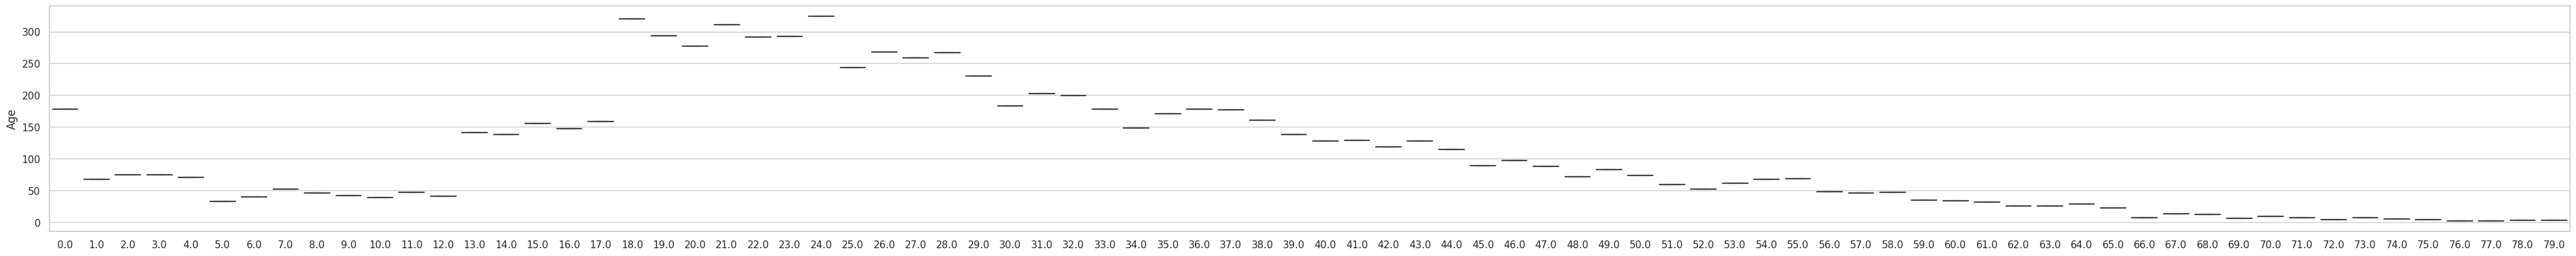

In [32]:
fig = plt.figure()
ax = fig.add_subplot()

fig.canvas.header_visible = True

fig.set_figheight(4.5)
fig.set_figwidth(50)

sns.boxplot(x=trd_age_all.index, y=trd_age_all)

распределение по возрастам можно даже посмотреть прямо так, по годично

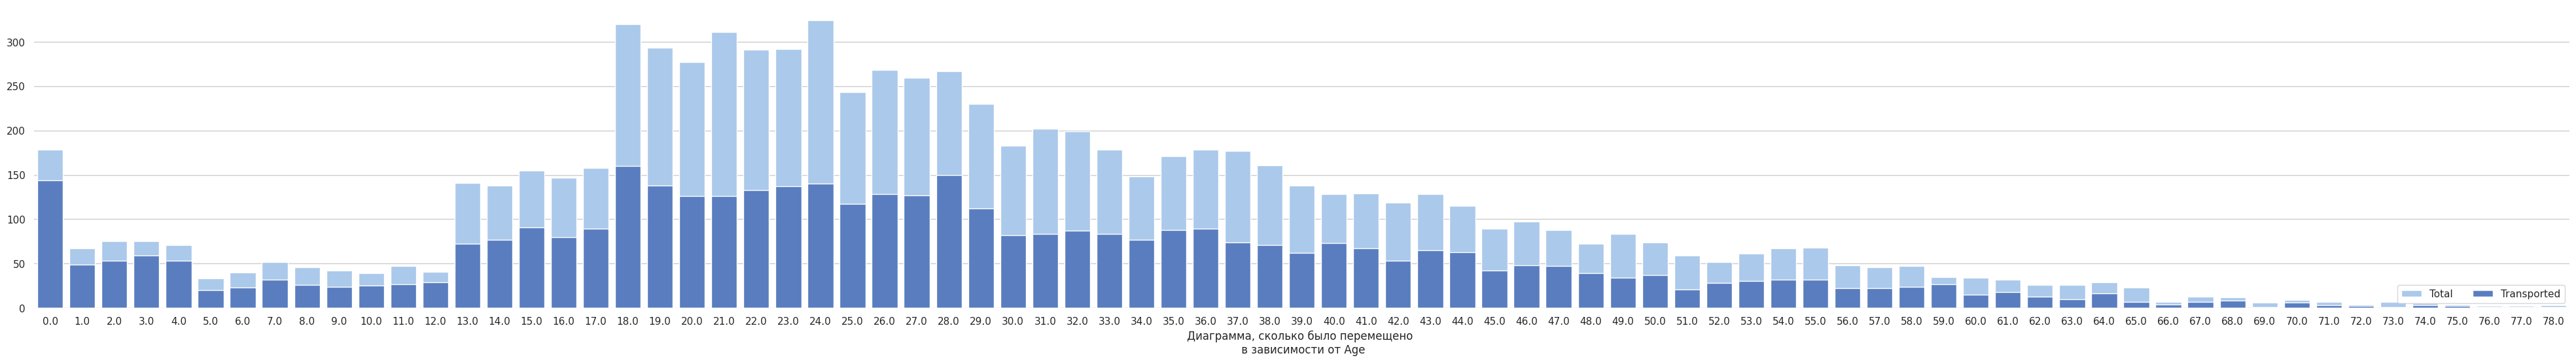

In [33]:
getBarplotMarkerVsTransported_rev2('Age', trd)

## В8. RoomService

Сумма, которую пассажир выставил в счет за каждое из многочисленных роскошных удобств космического корабля Титаник .

In [48]:
trd.RoomService

0         0.0
1       109.0
2        43.0
3         0.0
4       303.0
        ...  
8688      0.0
8689      0.0
8690      0.0
8691      0.0
8692    126.0
Name: RoomService, Length: 8693, dtype: float64

In [34]:
# описательная статистика
trd.RoomService.describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

При работе с непрерывными числовыми данными часто бывает полезно разделить (to bin) данные на несколько сегментов для дальнейшего анализа. (Существует несколько терминов: сегментирование (bucketing), дискретное разделение (discrete binning), дискретизация (discretization) или квантование (quantization))


In [60]:
# попробую поделить на 150 равномерных отрезков этот сет из сумм чеков
df_RoomService = pd.cut(trd['RoomService'], bins=np.linspace(0, 15000, 150))
df_RoomService.head()

0                   NaN
1    (100.671, 201.342]
2        (0.0, 100.671]
3                   NaN
4    (302.013, 402.685]
Name: RoomService, dtype: category
Categories (149, interval[float64, right]): [(0.0, 100.671] < (100.671, 201.342] < (201.342, 302.013] < (302.013, 402.685] ... (14597.315, 14697.987] < (14697.987, 14798.658] < (14798.658, 14899.329] < (14899.329, 15000.0]]

In [69]:
df_RoomService_valuecount = df_RoomService.value_counts()
df_RoomService_valuecount.head(50)

(0.0, 100.671]            1022
(100.671, 201.342]         266
(201.342, 302.013]         155
(503.356, 604.027]         153
(704.698, 805.369]         149
(302.013, 402.685]         147
(604.027, 704.698]         134
(402.685, 503.356]         132
(805.369, 906.04]          106
(906.04, 1006.711]          77
(1006.711, 1107.383]        65
(1208.054, 1308.725]        65
(1107.383, 1208.054]        56
(1308.725, 1409.396]        44
(1711.409, 1812.081]        33
(1409.396, 1510.067]        31
(1610.738, 1711.409]        27
(1912.752, 2013.423]        24
(1812.081, 1912.752]        23
(1510.067, 1610.738]        23
(2013.423, 2114.094]        19
(2214.765, 2315.436]        16
(2114.094, 2214.765]        13
(2416.107, 2516.779]        12
(2516.779, 2617.45]         12
(3523.49, 3624.161]         10
(2617.45, 2718.121]         10
(2315.436, 2416.107]         9
(2919.463, 3020.134]         8
(2718.121, 2818.792]         8
(3020.134, 3120.805]         7
(3120.805, 3221.477]         7
(3322.14

<AxesSubplot: ylabel='RoomService'>

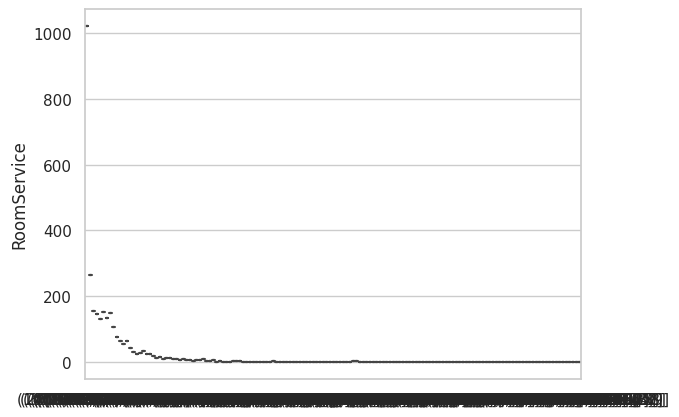

In [59]:
fig.set_figheight(4.5)
fig.set_figwidth(50)

sns.boxplot(x=df_RoomService_valuecount.index, y=df_RoomService_valuecount)

In [66]:
# попробую поделить на квентильные отрезки
#df_RoomServi_cutq = pd.qcut(trd['RoomService'], q=4)
#df_RoomServi_cutq.head()

# ERROR - не делит )

<AxesSubplot: xlabel='RoomService'>

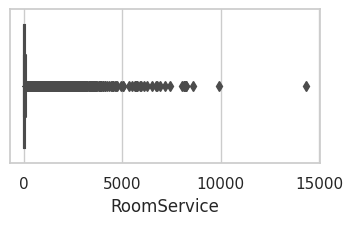

In [47]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_figheight(2)
fig.set_figwidth(4)
sns.boxplot(x=trd.RoomService)

In [ ]:
# массив, показывающий распределение количества пассажиров - всего по признаку
trd_marker_all = trd[marker].value_counts()
# массив с количеством перемещенных пассажиров по признаку
trd_marker_transported = trd[[marker, 'Transported']].groupby([marker]).value_counts()
# и приведу в порядок это массив, сбору индексы что бы избавится от многоуровневых индексов
# и появившееся после этого название столбца 0 переименую в понятное Value
trd_marker_transported = trd_marker_transported.reset_index().rename(columns={0:'Value'})
# и концовочка - собрать только те значения, которые относятся к перемещенным

## В9. FoodCourt

In [35]:
# описательная статистика
trd.FoodCourt.describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

## В10. ShoppingMall

In [36]:
# описательная статистика
trd.ShoppingMall.describe()

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

## В11. Spa

In [37]:
# описательная статистика
trd.Spa.describe()

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

## B12. VRDeck

In [38]:
# описательная статистика
trd.VRDeck.describe()

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64

## В13. Name

In [39]:
# описательная статистика
trd.Name.describe()

count               8493
unique              8473
top       Gollux Reedall
freq                   2
Name: Name, dtype: object